In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time
import requests
import os
import csv
import seaborn as sns
sns.set()

import warnings  
warnings.filterwarnings('ignore')

%matplotlib inline
"""
кароче вот это типа библиотека
"""
import prometheus_api

In [2]:

"""
тут мы написали запрос, синтексис интуетивно понятен
чтобы быстро работало нужно указывать instance
"""
query = 'abgw_iop_latency_ms_count{err="OK", iop="isync", proxied="0", instance="au2-acs1-stor01.vstoragedomain"}'
START_TIME = '1/06/2019 12:00'
END_TIME = '10/06/2019 12:23'
step = '30m'

In [6]:
df_init = prometheus_api.PrometheusApi.get_normalized_time_series(query, START_TIME, END_TIME, step)
print("got df")

got df


In [19]:
print(df_init)
"""
нате посмотрите на то что такое df, time_index это инекс, хз как к нему обращаться, а вот к столбцу time можно
обозначил тут df_init чтобы много раз его не загружать
"""

            abgw_iop_latency_ms_count_dc=au2-acs1_err=OK_instance=au2-acs1-stor01.vstoragedomain_iop=isync_proxied=0  \
time_index                                                                                                             
1559379600                                         80327328.0                                                          
1559381400                                         80361930.0                                                          
1559383200                                         80373058.0                                                          
1559385000                                         80388816.0                                                          
1559386800                                         80449814.0                                                          
...                                                       ...                                                          
1560150000                              

'\nнате посмотрите на то что такое df, time_index это инекс, хз как к нему обращаться, а вот к столбцу time можно\nобозначил тут df_init чтобы много раз его не загружать\n'

In [18]:
print(df_init.columns.values)

"""
обозначим колонку чтобы не таскать её всё время, внизу список всх возможных колонок
"""
target_column = 'abgw_iop_latency_ms_count_dc=au2-acs1_err=OK_instance=au2-acs1-stor01.vstoragedomain_iop=isync_proxied=0'


['abgw_iop_latency_ms_count_dc=au2-acs1_err=OK_instance=au2-acs1-stor01.vstoragedomain_iop=isync_proxied=0'
 'time' 'proizv']


In [8]:
print(type(df_init[target_column].tolist()[1] ))

<class 'float'>


In [17]:

"""
повторяю то что написано
"""

df = df_init
df['proizv'] = df[target_column].diff()
print(df)

            abgw_iop_latency_ms_count_dc=au2-acs1_err=OK_instance=au2-acs1-stor01.vstoragedomain_iop=isync_proxied=0  \
time_index                                                                                                             
1559379600                                         80327328.0                                                          
1559381400                                         80361930.0                                                          
1559383200                                         80373058.0                                                          
1559385000                                         80388816.0                                                          
1559386800                                         80449814.0                                                          
...                                                       ...                                                          
1560150000                              

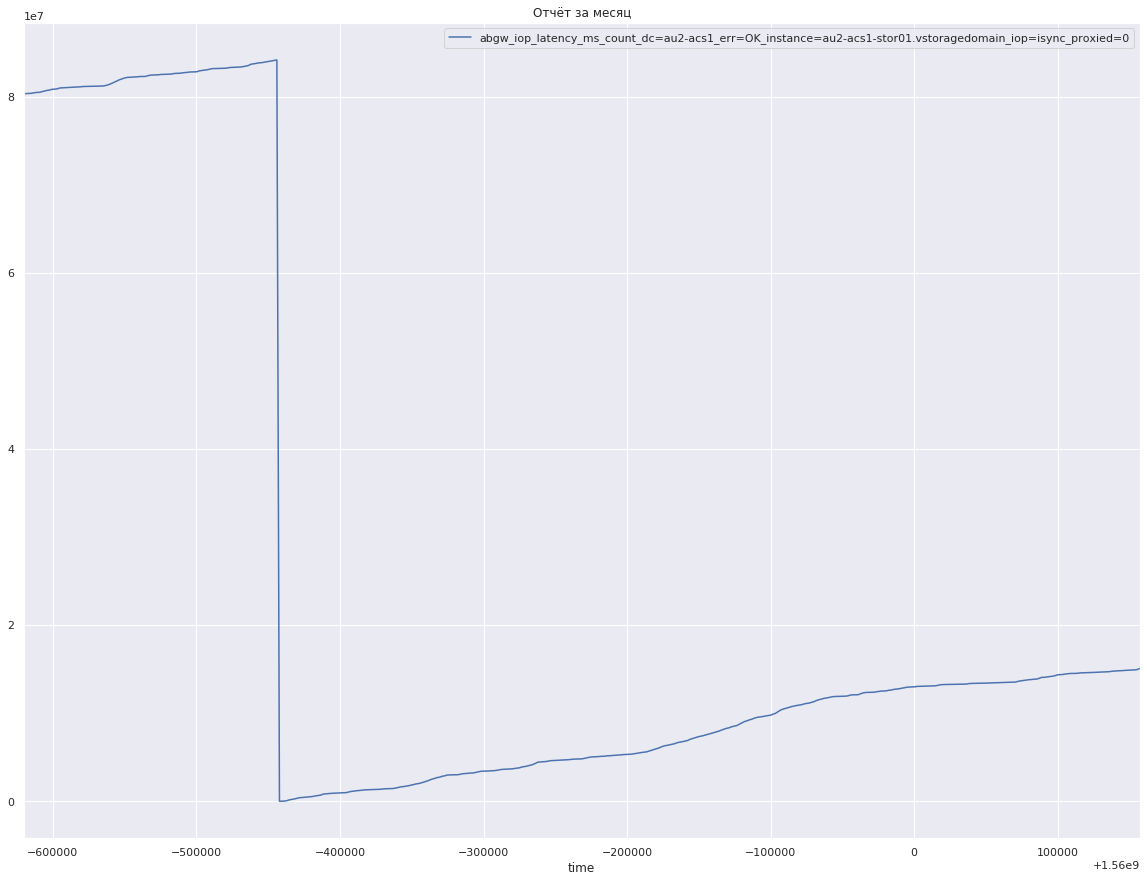

In [12]:
df.plot(y='abgw_iop_latency_ms_count_dc=au2-acs1_err=OK_instance=au2-acs1-stor01.vstoragedomain_iop=isync_proxied=0',
        x='time',figsize=(20, 15),title = 'Отчёт за месяц')

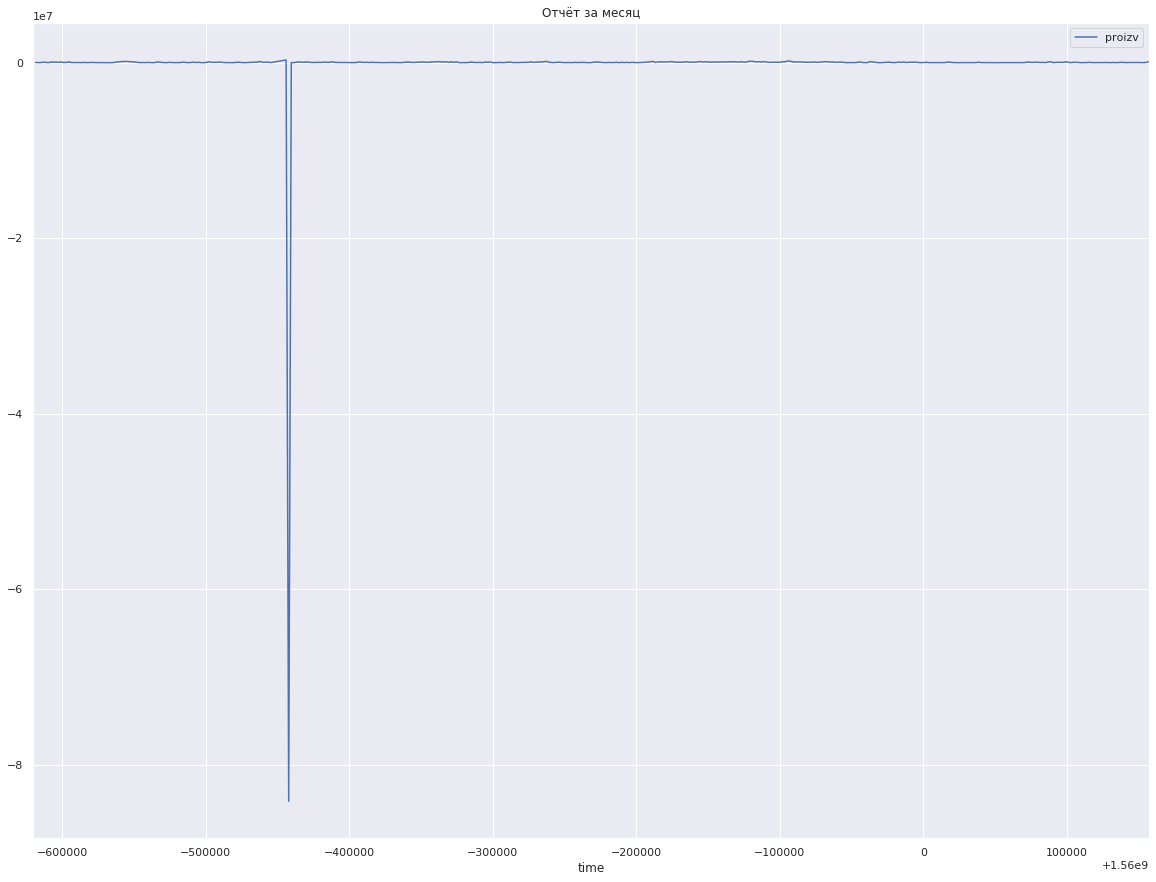

In [13]:
df.plot(y='proizv',x='time',figsize=(20, 15),title = 'Отчёт за месяц')

In [ ]:
def NaN_fouder(df: pd.core.frame.DataFrame, metric:str):
    df_1 = df[df.isnull()]
    df_1['index_1'] = range(df_1.shape[0])
    df_result = pd.DataFrame(columns=['time_start','time_end','index_start','index_end'])
    i = 0
    while True:
        tmp = df_1.index.min() - df_1['index_1'].min()
        df_tmp = df_1[df_1.index - df_1['index_1'] == tmp]
        df_result.loc[i]=[df_tmp['time'][0],df_tmp['time'][df_tmp.shape[0]-1],df_tmp.index[0],df_tmp.index[df_tmp.shape[0]-1]]
        if df_tmp.shape[0] == df_1.shape[0]:
            break
        else:
            i += 1
            df_1 = df_1[df_1.index>df_tmp.index[df_tmp.shape[0]-1]]
    return df_result
  